In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import phyre
import torch
import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING) 

In [2]:
tier = 'ball'
eval_setup = 'ball_within_template'
fold_id = 0
random.seed(0)

### 1. Initialize the  Simulation Cache

In [3]:
train, dev, test = phyre.get_fold(eval_setup, fold_id)
print('Size of resulting splits:\n train:', len(train), '\n dev:',
      len(dev), '\n test:', len(test))

Size of resulting splits:
 train: 1600 
 dev: 400 
 test: 500


In [4]:
cache = phyre.get_default_100k_cache(tier)
print('cache.action_array shape:', cache.action_array.shape)

cache.action_array shape: (100000, 3)


### 2. Initialize the DQN Agent

In [5]:
from dqn import DQNAgent

DEBUG:root:test


In [6]:
agent = DQNAgent()

### Load Model

In [ ]:
model = agent.build_model()
#new_model = TestModel()
model.load_state_dict(torch.load("./model/test_model.pth"))
state = dict(model =model, cache = cache)

### 3. Train the Agent

In [ ]:
state, statistic = agent.train(cache, train, tier, test)

INFO:root:Preprocess the training data
INFO:root:Train set: size=117005756, solved_ratio=1.71%
INFO:root:Create evaluation data from train & dev
INFO:root:Start initializing the Model
INFO:root:Start Training the Model
/home/mynsng/anaconda3/envs/phyre/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
DEBUG:root:Iter: 1000, examples: 16000, mean loss: 0.037528, speed: 2.2 batch/sec, lr: 0.000300
DEBUG:root:Iter: 2000, examples: 32000, mean loss: 0.013059, speed: 2.2 batch/sec, lr: 0.000300
DEBUG:root:Iter: 3000, examples: 48000, mean loss: 0.014241, speed: 2.2 batch/sec, lr: 0.000300
DEBUG:root:Iter: 4000, examples: 64000, mean loss: 0.018098, speed: 2.2 batch/sec, lr: 0.000300
DEBUG:root:Iter: 5000, examples: 80000, mean loss: 0.014264, speed: 2.2 batch/sec, lr: 0.000300
DEBUG:root:Iter: 6000, examples: 96000, mean loss: 0.009875, speed: 2.2 batc

In [8]:
#num = -2:

max_loss = statistic['max_loss']
print(max_loss[-10:])
min_loss = statistic['min_loss']
print(min_loss[-10:])
mean_loss = statistic['mean_loss']
print(mean_loss[-10:])
max_loss_index= statistic['max_loss_index']
print(max_loss_index[-10:])
min_loss_index= statistic['min_loss_index']
print(min_loss_index[-10:]) 
max_loss_action = statistic['max_loss_action']
print(max_loss_action[-10:])
min_loss_action = statistic['min_loss_action']
print(min_loss_action[-10:])
loss_var = statistic['loss_var']
print(loss_var[-10:])

i=1
a = max_loss_index[-10:][i].item()
b = max_loss_action[-10:][i].cpu().numpy()

print(a, b)

[0.18164226412773132, 0.17554238438606262, 0.16778849065303802, 0.14578059315681458, 0.1743445098400116, 0.1647162139415741, 0.16376365721225739, 0.15559786558151245, 0.14686551690101624, 0.17140579223632812]
[0.07855117321014404, 0.08437171578407288, 0.08681027591228485, 0.0784032791852951, 0.10258635878562927, 0.08723126351833344, 0.07501397281885147, 0.06804411858320236, 0.07492437213659286, 0.08613467216491699]
[0.12223625928163528, 0.12018115818500519, 0.12415406852960587, 0.11508794128894806, 0.12330261617898941, 0.1206134557723999, 0.11263728886842728, 0.10721632838249207, 0.1118106096982956, 0.11304730921983719]
[tensor(228), tensor(211), tensor(252), tensor(316), tensor(1501), tensor(200), tensor(243), tensor(350), tensor(13), tensor(249)]
[tensor(1252), tensor(442), tensor(463), tensor(508), tensor(147), tensor(156), tensor(274), tensor(529), tensor(529), tensor(412)]
[tensor([0.6589, 0.7709, 0.8309], device='cuda:0'), tensor([0.0719, 0.3838, 0.4581], device='cuda:0'), tensor

### Visualize

In [9]:
task_ids = [train[a]]
action = b
images, predict_images = agent.predict_qa(state, task_ids, tier, action)

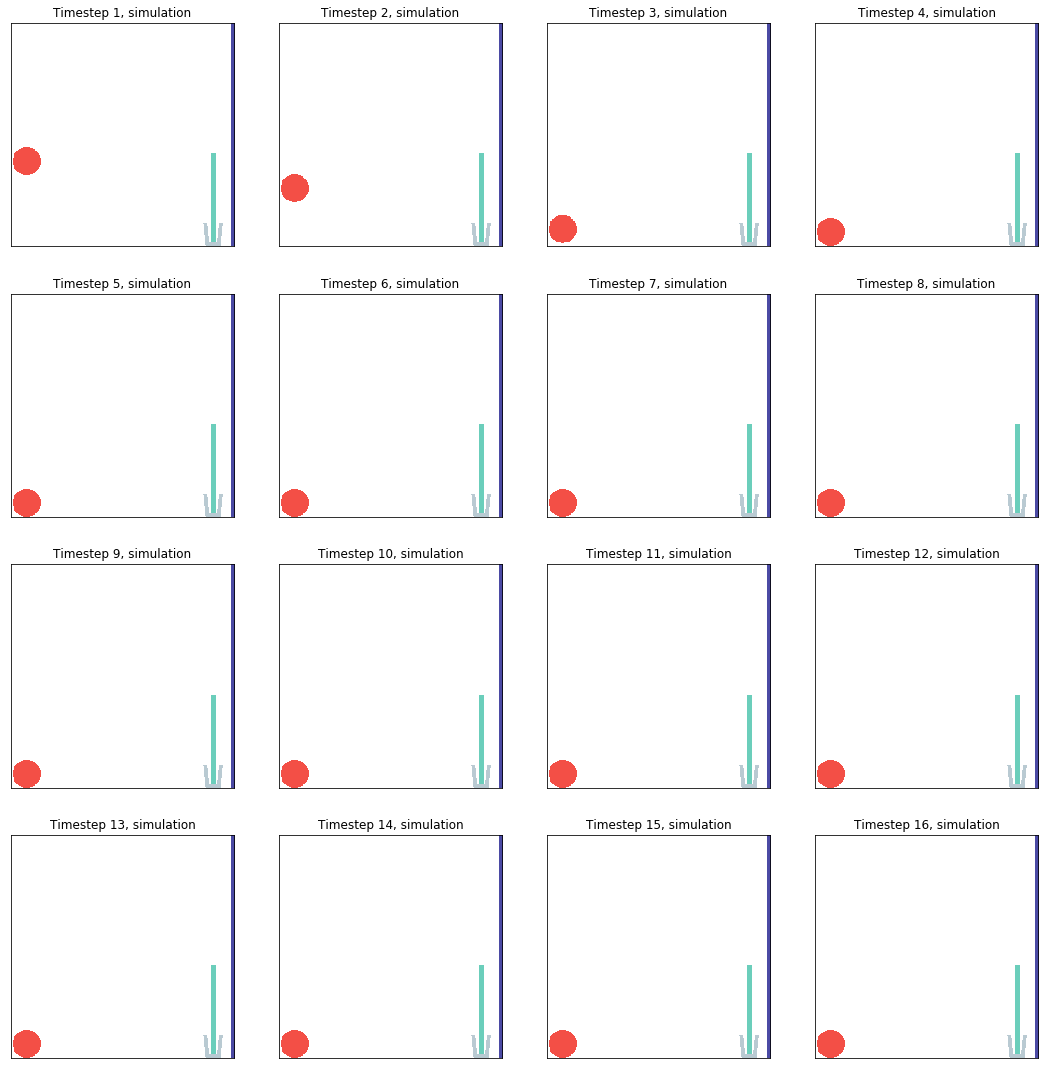

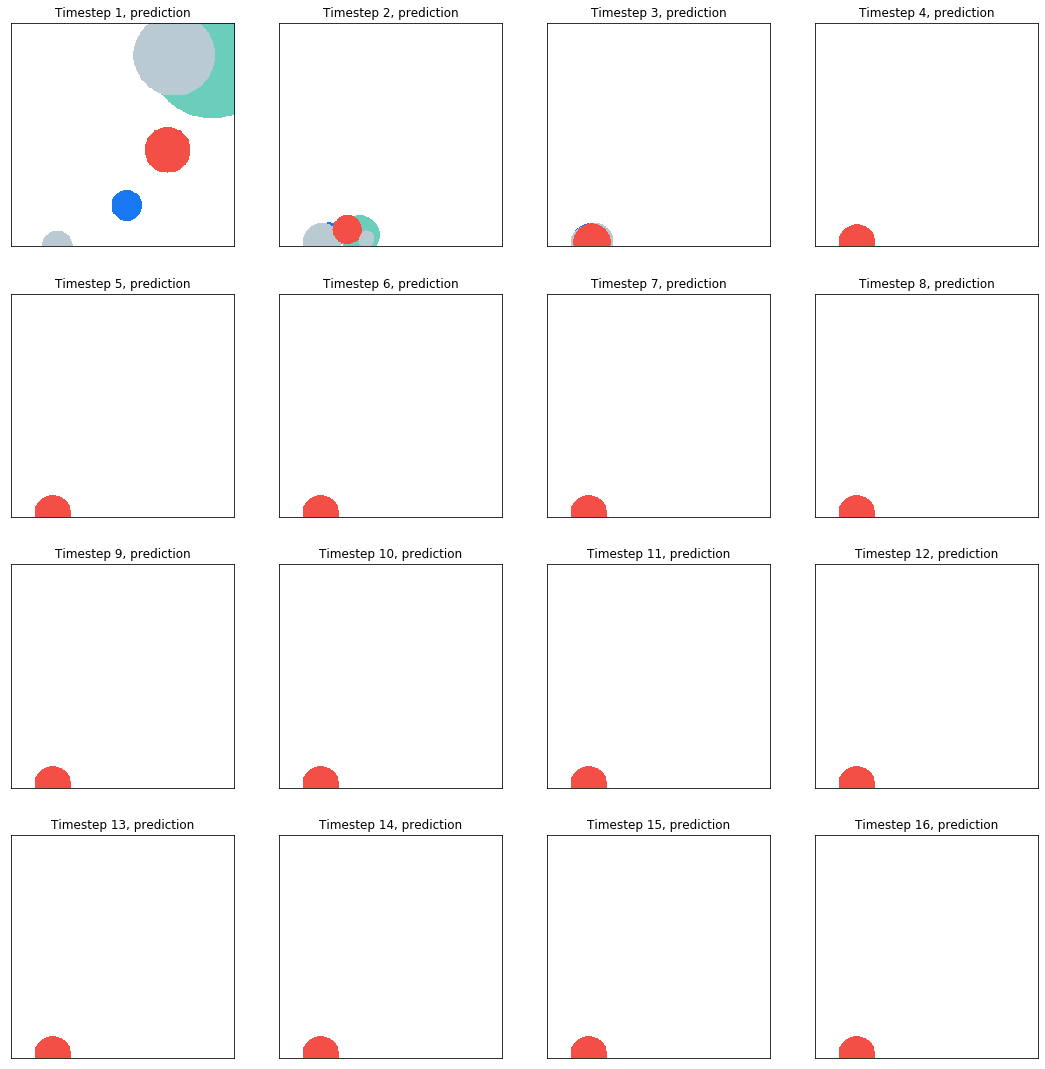

In [10]:
# plot할 개수 설정
fig1, axs1 = plt.subplots(4, 4, figsize=(15, 15))
fig1.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.2)

fig2, axs2 = plt.subplots(4, 4, figsize=(15, 15))
fig2.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.2)

# plot 해보리기~~
for i, (ax, image) in enumerate(zip(axs1.flatten(), images)):
    # Convert the simulation observation to images.
    img = phyre.observations_to_float_rgb(image)
    ax.imshow(img)
    
    ax.title.set_text(f'Timestep {i+1}, simulation')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    
for i, (ax, image) in enumerate(zip(axs2.flatten(), predict_images)):
    # Convert the simulation observation to images.
    img = phyre.observations_to_float_rgb(image)
    ax.imshow(img)
    
    ax.title.set_text(f'Timestep {i+1}, prediction')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

### 4. Evaluate the Agent

#### 4.1 Percentage of solved tasks per number of attempts

In [10]:
loss = agent.get_test_loss(state, test, tier)
print(loss)

0.012804135651094839


#### 4.2 AUCESS

In [11]:
model  = state['model']

# save
savePath = "./model/test_model_within.pth"
torch.save(model.state_dict(), savePath)

# load
#new_model = TestModel()
#new_model.load_state_dict(torch.load("./output/test_model.pth"))